<a href="https://colab.research.google.com/github/Eddythemachine/classification_coursera/blob/main/svm_with_nyostroem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION: CUSTOMER CHURN PREDICTION USING SUPPORT VECTOR MACHINES AND KERNEL APPROXIMATION

Customer churn prediction has become a critical component of modern customer relationship management, especially in the banking sector where acquiring new customers is far more expensive than retaining existing ones. Accurate churn models enable banks to identify high-risk customers early and take proactive measures to maintain long-term loyalty and profitability.

In this study, I explore the use of Support Vector Machines (SVM) for predicting customer churn. SVM is a robust and widely used classification algorithm capable of learning complex, non-linear decision boundaries through kernel functions. Despite its strengths, traditional kernel-based SVMs suffer from high computational cost when applied to large datasets, making them challenging to deploy in real-time or large-scale environments.

To address this limitation, I incorporate the Nystroem kernel approximation technique, which efficiently approximates the RBF kernel by mapping the input data into a lower-dimensional feature space. This approach significantly reduces training time and memory usage while preserving the accuracy benefits of non-linear SVMs.

By integrating SVM with Nystroem approximation, this project demonstrates how advanced machine learning techniques can provide fast, scalable, and highly accurate churn prediction for banking applications.

# Dataset Description: Bank Customer Churn Dataset

The Bank Customer Churn dataset contains information about 10,000 customers from ABC Multistate Bank. It provides a mix of demographic, financial, and behavioral attributes that help determine whether a customer is likely to leave the bank. The goal of the dataset is to build predictive models that classify customers into two groups: churned (1) or not churned (0).

The dataset includes the following features:

**customer_id** — A unique identifier for each customer. This field is not predictive and is excluded from modeling.

**credit_score** — A numerical value representing the customer’s creditworthiness. Higher values indicate lower credit risk.

**country** — The customer’s country of residence (categorical).

**gender** — The customer's gender (categorical).

**age** — Age of the customer in years. This variable often has a strong influence on churn behavior.

**tenure** — Number of years the customer has been with the bank.

**balance** — The account balance of the customer. Large variations may indicate different financial behaviors.

**products_number** — Count of banking products the customer uses (e.g., account, credit card, loan).

**credit_card** — Indicates whether the customer owns a credit card (1 = yes, 0 = no).

**active_member** — Indicates if the customer is considered an active user of banking services (1 = active, 0 = inactive).

**estimated_salary** — The customer’s estimated annual salary.

**churn** — The target variable. It is 1 if the customer left the bank and 0 if the customer stayed.

Overall, the dataset captures a comprehensive snapshot of customer behavior and financial profile, making it suitable for churn prediction using machine learning techniques such as Support Vector Machines (SVM).

# IMPORTING LIBS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# IMPORTING DATASET

## Download from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 187k/187k [00:00<00:00, 25.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1


In [3]:
import shutil
import os

# Define destination
destination = "/content/bank-customer-churn-dataset"

# Copy dataset from KaggleHub cache to working directory
shutil.copytree(path, destination, dirs_exist_ok=True)

print("Files copied to:", destination)


Files copied to: /content/bank-customer-churn-dataset


In [4]:
df = pd.read_csv("bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [5]:
#df shape
df.shape

(10000, 12)

In [6]:
#df description
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Drop the 'customer_id' column as it is not predictive
df = df.drop('customer_id', axis=1)
print("DataFrame after dropping 'customer_id' column:")
display(df.head())

DataFrame after dropping 'customer_id' column:


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#checking for missing values
df.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [10]:
#checking nan values
df.isna().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'customer_id' from numerical_cols as it's an identifier and not a predictive feature
if 'customer_id' in numerical_cols:
    numerical_cols.remove('customer_id')

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
Categorical columns: ['country', 'gender']


In [12]:
# Check Duplicated
df.duplicated().sum()

np.int64(0)

In [13]:
#function to print unique columns
def print_unique_col(df):
    for column in df.columns:
        print(f"Unique values in column '{column}':\n{df[column].unique()}\n")

In [14]:
#print unique columns
print_unique_col(df)

Unique values in column 'credit_score':
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 80

In [15]:
# Seperate into numerical columns and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Target Column
target_col = 'churn'

# Exclude 'churn' from numerical_cols for plotting distributions, as it's the target variable
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
Categorical columns: ['country', 'gender']


### Count plot
Countplot counts how many times each category appears in your data and plots it as a bar chart.

/tmp/ipython-input-3738691474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-3738691474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


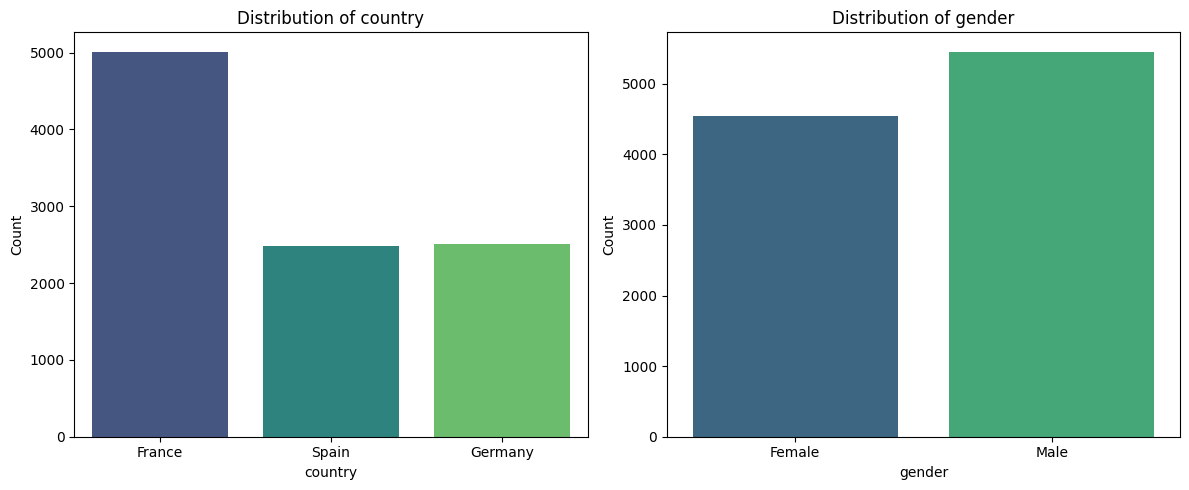

In [16]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Box Plot

A box plot visualizes the distribution of a numerical variable and highlights:

1. Median (Q2)

The middle value — shown as a line inside the box.

2. Quartiles

Q1 (25th percentile) → bottom of the box

Q3 (75th percentile) → top of the box

3. IQR (Interquartile Range)

IQR = Q3 − Q1
Represents the middle 50% of the data.

4. Whiskers

Extend from the box to show the rest of the data (typically within 1.5 × IQR).

5. Outliers

Points outside the whiskers are plotted individually.

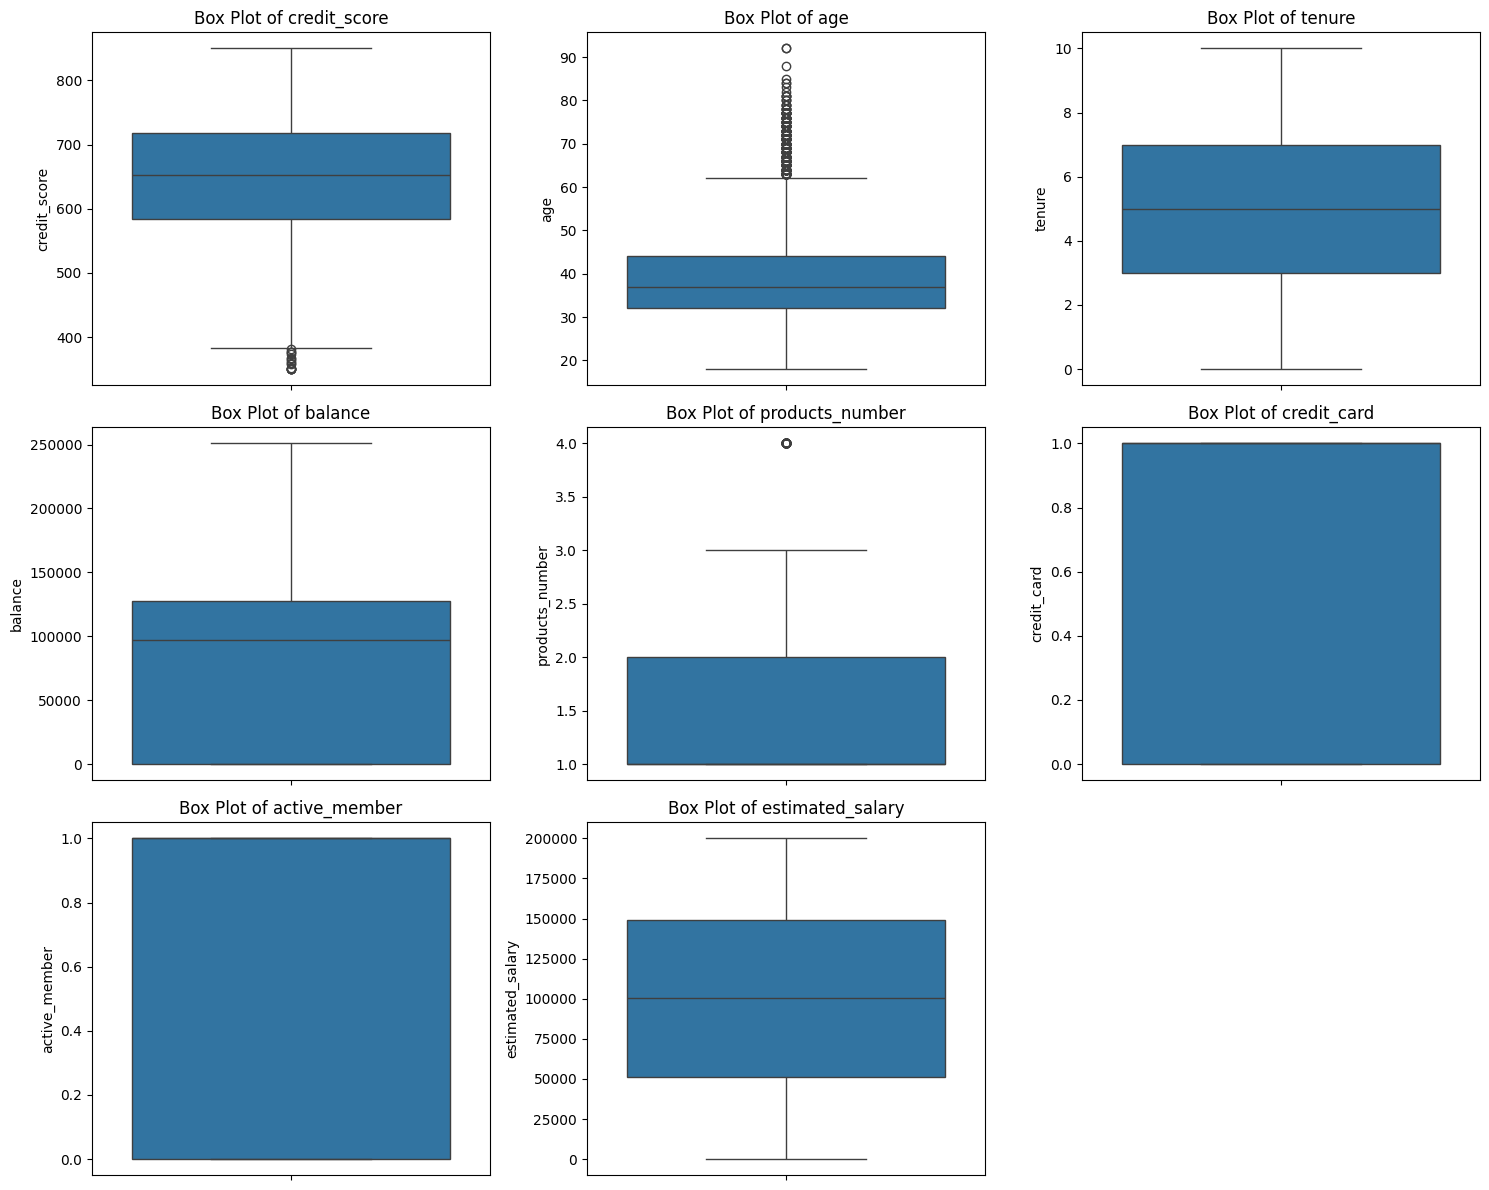

In [17]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Scatter Plot
A scatter plot shows the relationship between two numerical variables by placing dots on an X–Y graph.

Each dot represents one data point.

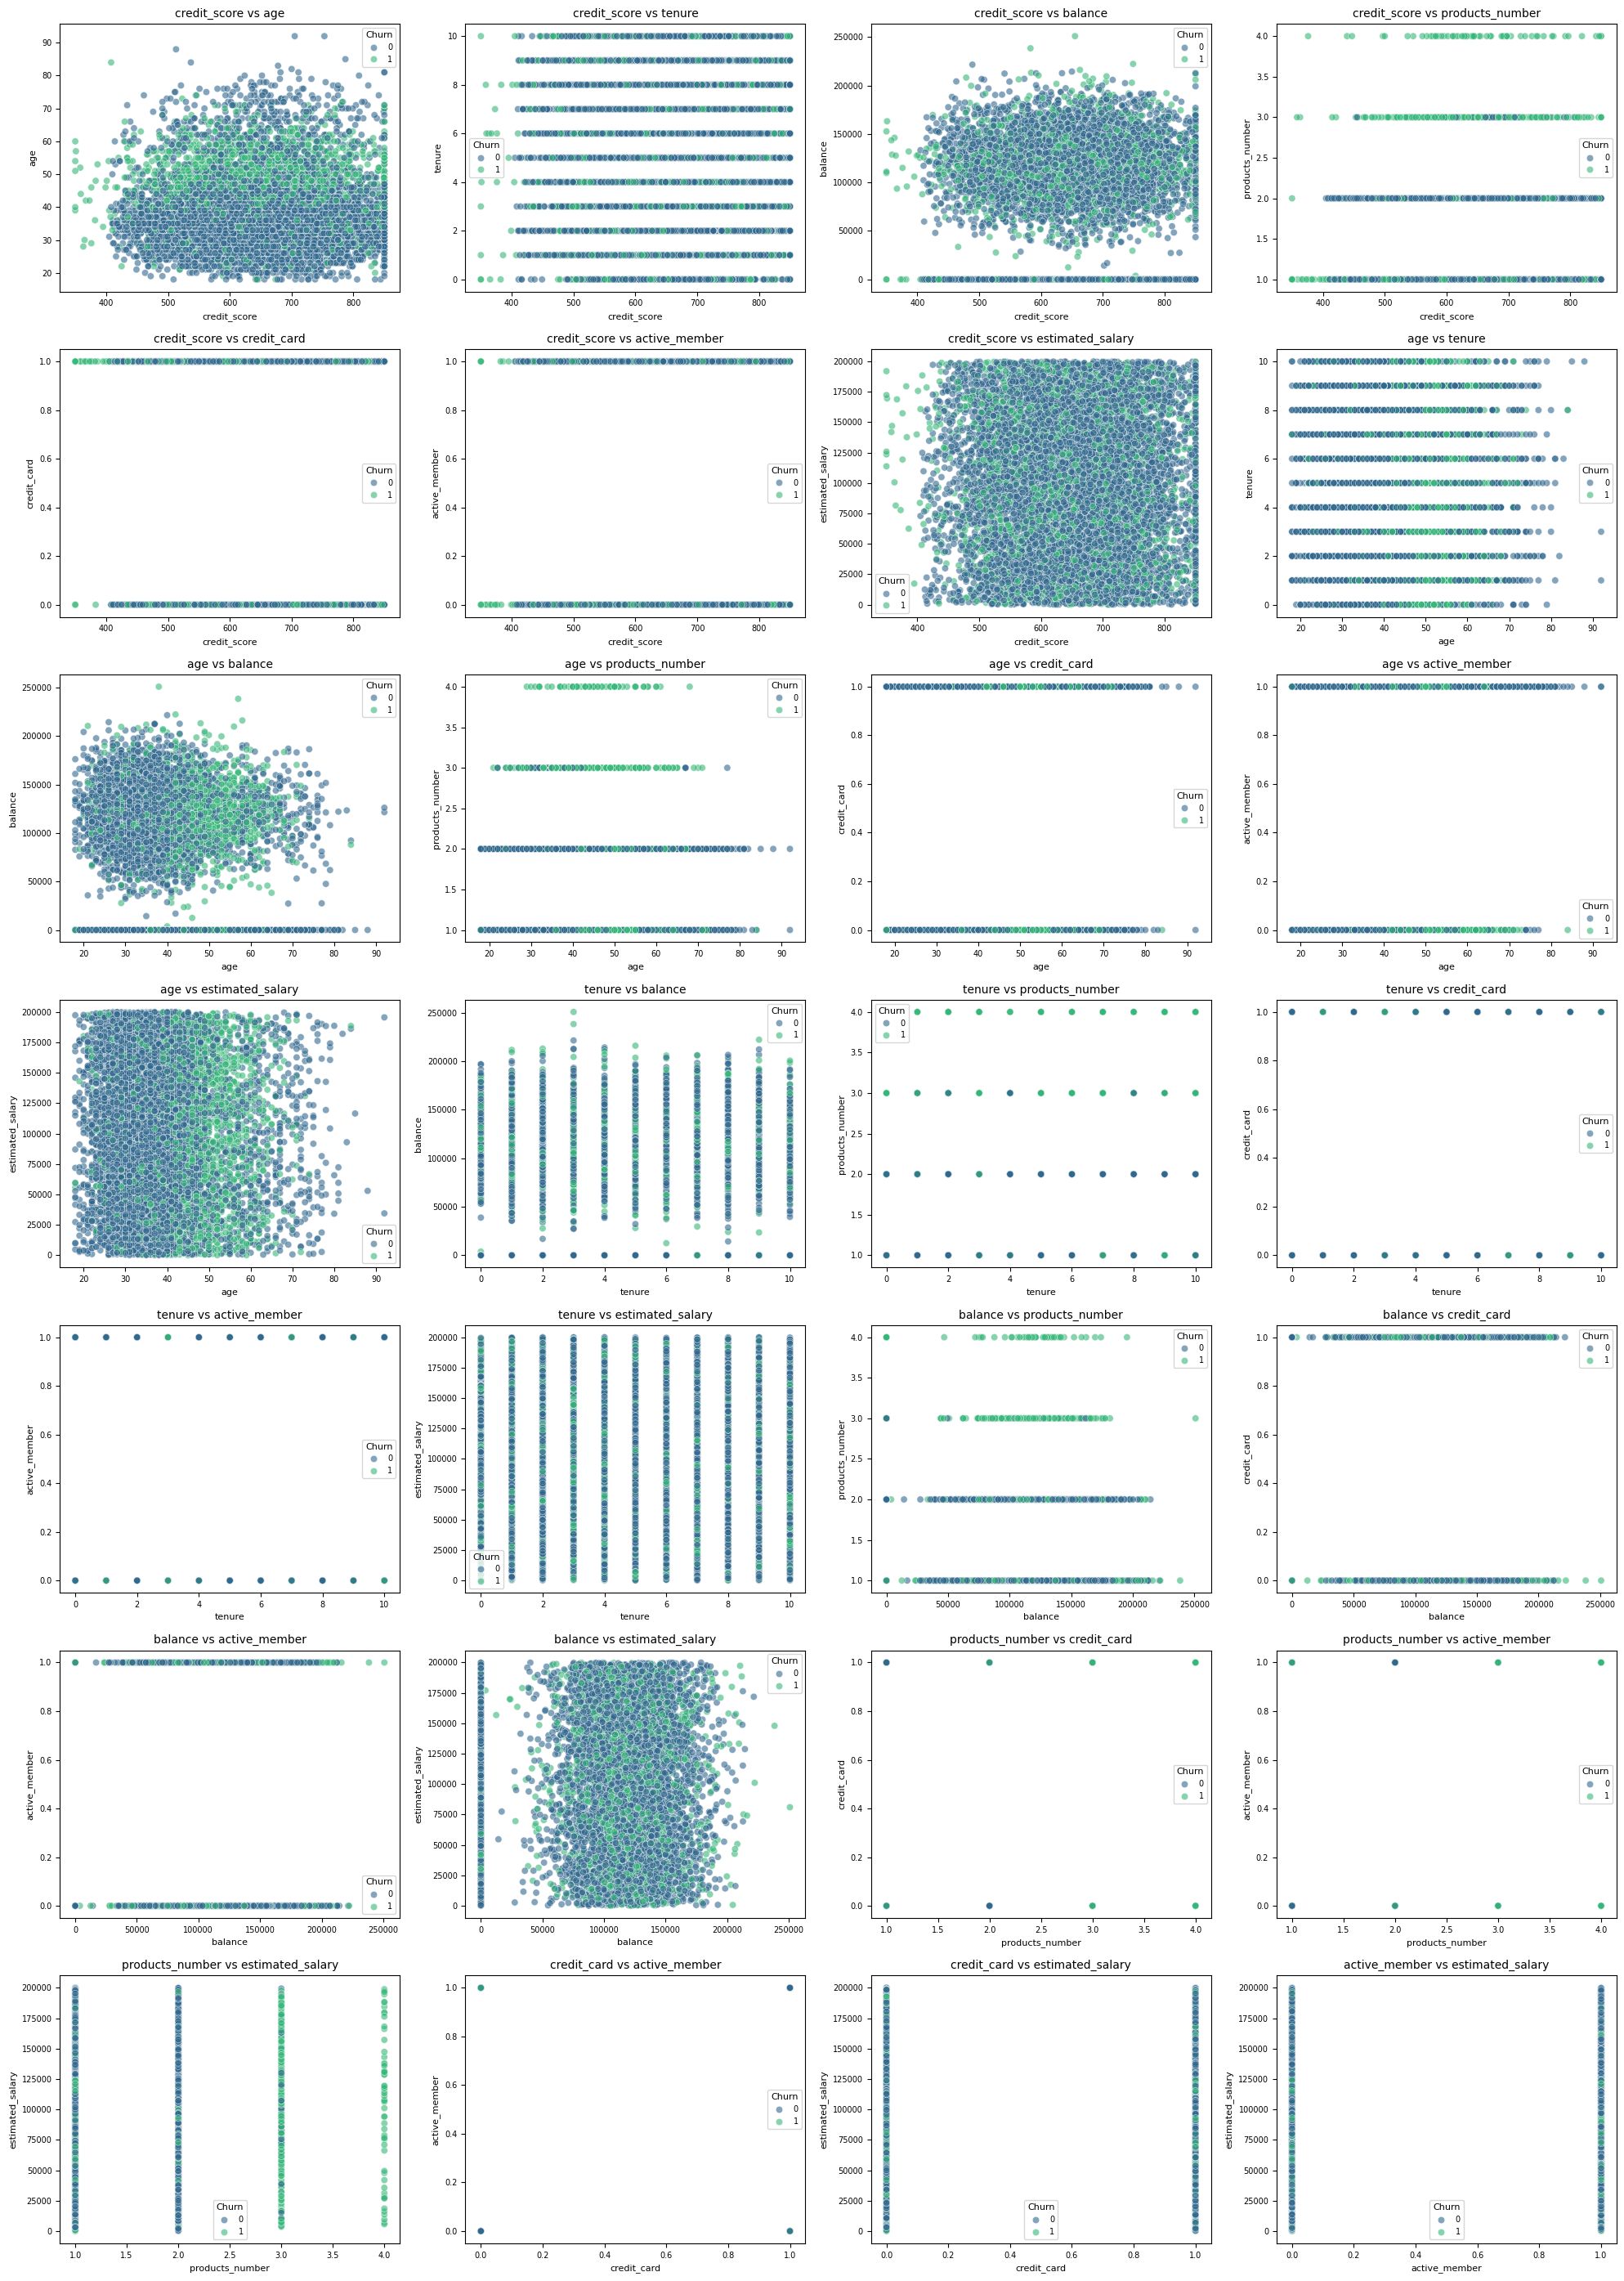

In [18]:
import itertools
if 'churn' in numerical_cols:
    numerical_cols_for_pairing = [col for col in numerical_cols if col != 'churn']
else:
    numerical_cols_for_pairing = numerical_cols

pairs = list(itertools.combinations(numerical_cols_for_pairing, 2))
num_plots = len(pairs)
plots_per_row = 4
num_rows = (num_plots + plots_per_row - 1) // plots_per_row # Ceiling division

plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

for i, (col1, col2) in enumerate(pairs):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.scatterplot(x=col1, y=col2, hue='churn', data=df, palette='viridis', alpha=0.6)
    plt.title(f'{col1} vs {col2}', fontsize=10) # Smaller title for readability
    plt.xlabel(col1, fontsize=8)
    plt.ylabel(col2, fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=7) # Smaller ticks
    plt.legend(title='Churn', fontsize=7, title_fontsize=8) # Smaller legend

plt.tight_layout()
plt.show()

### Count Plot

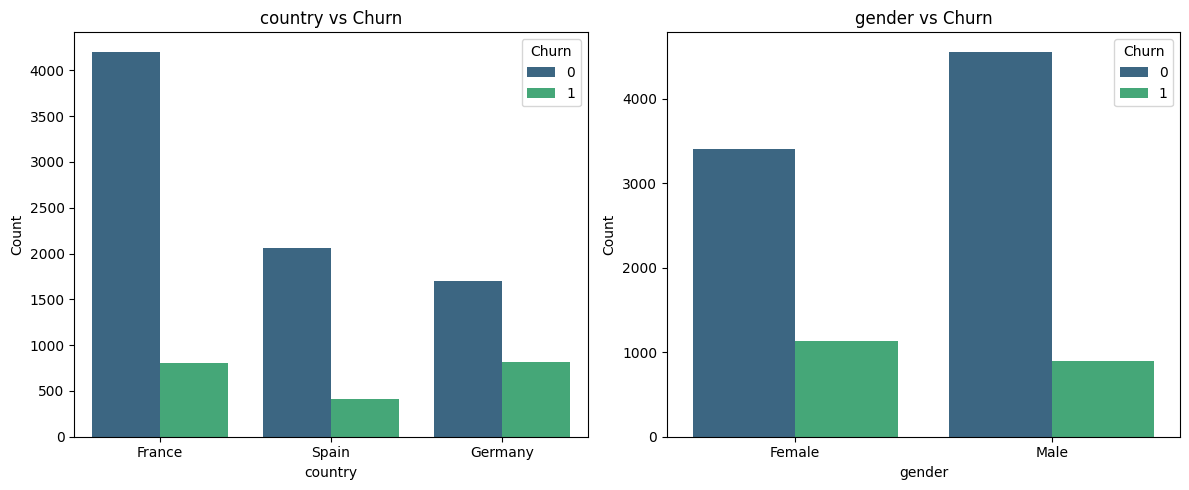

In [19]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(x=col, hue='churn', data=df, palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### Histogram

A histogram shows the distribution of a numerical (continuous) variable by splitting the data into bins (ranges) and plotting how many values fall into each bin.

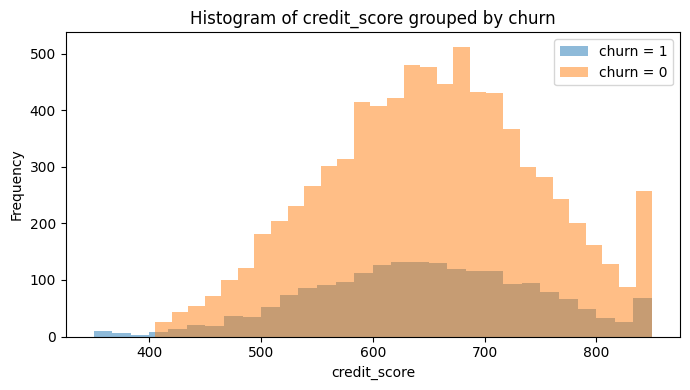

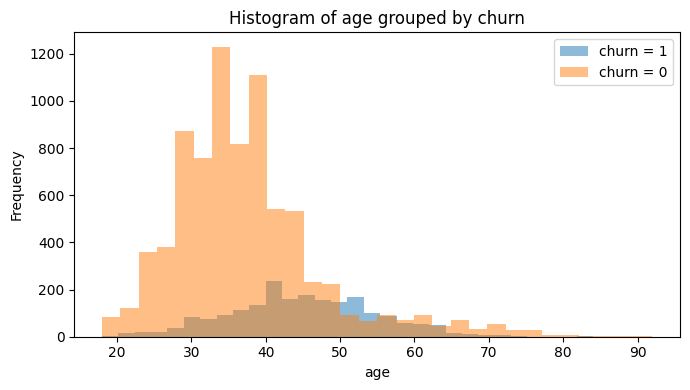

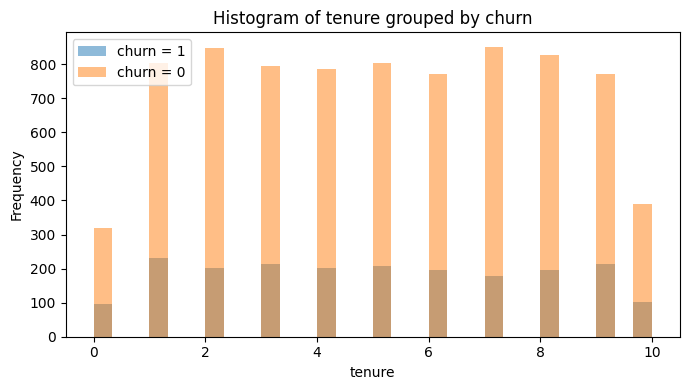

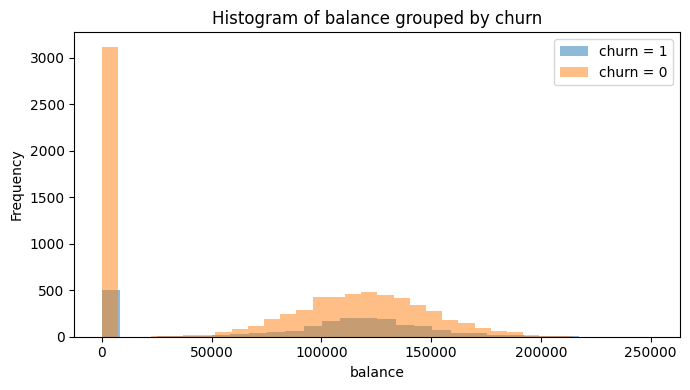

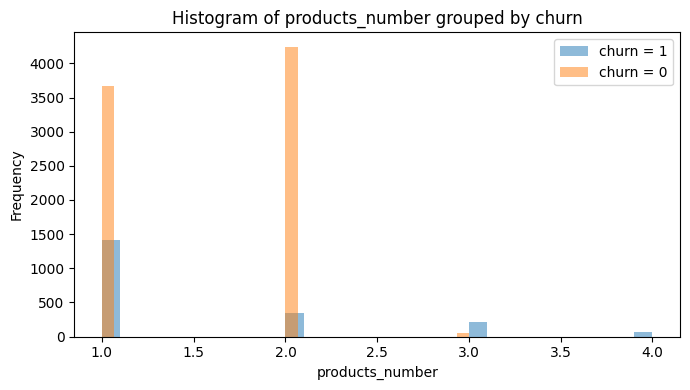

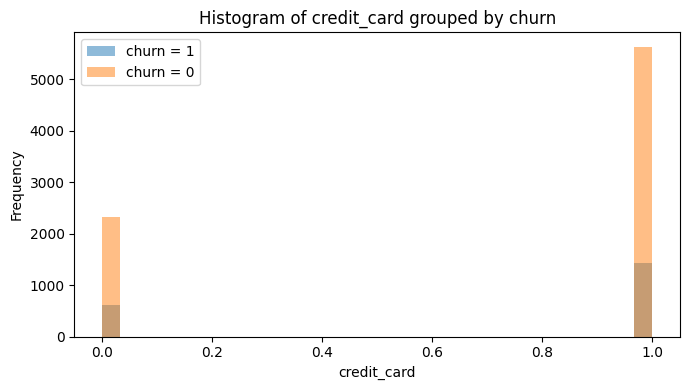

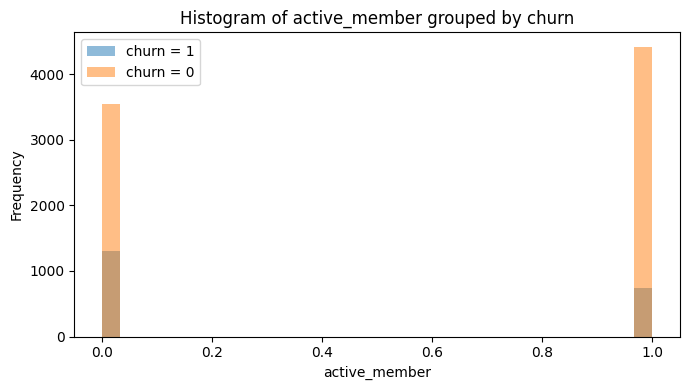

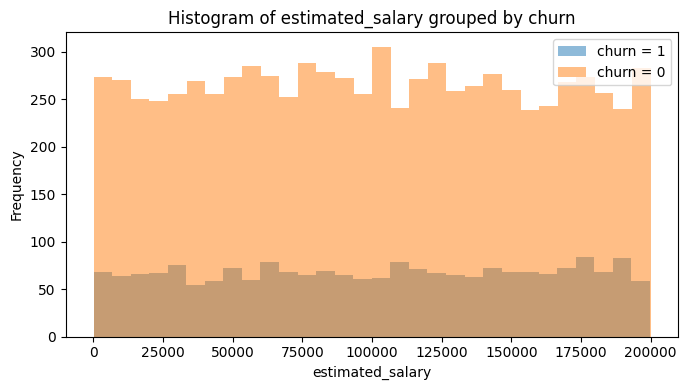

In [20]:
# loop through numeric columns
for col in numerical_cols:
    if col == target_col:
        continue  # skip target if it's numeric

    plt.figure(figsize=(7, 4))

    # plot histogram for each class in the target column
    for label in df[target_col].dropna().unique():
        subset = df[df[target_col] == label]
        plt.hist(
            subset[col],
            bins=30,
            alpha=0.5,
            label=f"{target_col} = {label}"
        )

    plt.title(f"Histogram of {col} grouped by {target_col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

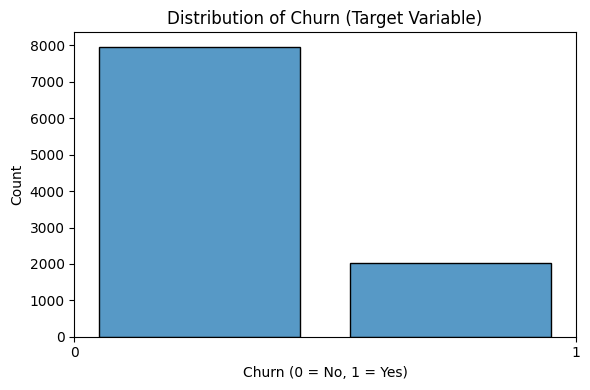

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['churn'], bins=2, kde=False, shrink=0.8)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

# Data Modelling

In [22]:
X = df.drop('churn', axis=1)
y = df['churn']

In [23]:
print(X,y)

      credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      credit_card  active_member  estim

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print_unique_col(df[categorical_cols])

Unique values in column 'country':
['France' 'Spain' 'Germany']

Unique values in column 'gender':
['Female' 'Male']



# Support Vector Machine (No parameter Tunning)

### Columns to Transform

In [26]:
standardize_columns = ['credit_score', 'age', 'balance', 'estimated_salary']
label_encode_columns = ["country", "gender"]
print(standardize_columns)

['credit_score', 'age', 'balance', 'estimated_salary']


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [28]:
# Define Transformers
numerical_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder()

In [29]:
# Combine them in Column Transformers
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, standardize_columns),
        ("cat", categorical_transformer, label_encode_columns)
    ])

In [30]:
# Build full Model Pipeline
pipeline_svm = Pipeline([
    ('preprocessing', preprocessing),
    ('svm', SVC())
])

In [31]:
%%time
# Fit Model
model_svm = pipeline_svm.fit(X_train, y_train)

CPU times: user 1.72 s, sys: 88 ms, total: 1.81 s
Wall time: 1.81 s


In [32]:
%%time
# Predictions SVM
y_pred_svm = model_svm.predict(X_test)

CPU times: user 379 ms, sys: 65 µs, total: 379 ms
Wall time: 381 ms


In [33]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.818

# SVM Parameter Tunning using GridSearch for best parameters



In [34]:
# Parameter Tunning
param_grid = {
    'svm__C': [0.1, 1, 2],
    'svm__kernel' : ["linear", "rbf", "poly"],
    'svm__gamma': [1, 0.1, 0.01]}

In [35]:
# Using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(
    estimator= pipeline_svm,
    param_grid=param_grid,
    cv = 5,
    scoring = "accuracy")

In [36]:
%%time
# Model Fit
grid_svm.fit(X_train,y_train)

CPU times: user 27 s, sys: 675 ms, total: 27.7 s
Wall time: 28 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'balance',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1], 'svm__gamma': [1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [37]:
best_model_svm = grid_svm.best_estimator_
best_params = grid_svm.best_params_
print(best_params)

{'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


In [38]:
%%time
# Prediction
svm_predictions = best_model_svm.predict(X_test)

CPU times: user 957 ms, sys: 2.85 ms, total: 960 ms
Wall time: 993 ms


# Using Nystroem

In [39]:
# Kernel Estimator Import
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

In [40]:
# Nystroem Pipeline
pipeline_nystroem = Pipeline([
    ("preprocess", preprocessing),
    ("nystroem", Nystroem(kernel="rbf", random_state=42)),
    ("model", SGDClassifier(random_state=42))
])

In [41]:
# Nystroem GridSearch
param_grid = {
    "nystroem__kernel": ["rbf", "polynomial", "sigmoid"],
    "nystroem__gamma": [0.01, 0.1, 1],
    "nystroem__n_components": [50, 100, 200],

    # SGDClassifier tuning
    "model__alpha": [0.0001, 0.001, 0.01],
    "model__max_iter": [1000, 3000]
}

In [42]:
grid_nystroem = GridSearchCV(
    estimator=pipeline_nystroem,
    param_grid=param_grid,
    cv=5,
    scoring = "accuracy")

In [43]:
%%time
grid_nystroem.fit(X_train,y_train)

CPU times: user 6min 33s, sys: 686 ms, total: 6min 33s
Wall time: 4min 2s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'balance',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('nystroem', Nystroem(random_state=42)),
                                       ('model',
                                        SGDClassifier(random_state=42))]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01],
                         'model__max_iter': [1000, 1500],
                         'nystroem__gamma': [0.01, 0.1, 1],
                         'nystroem__kernel': ['rbf', 'polynomial', 'sigmoid'],
                         'nystroem__n_components': [50, 100, 200]},
             scoring='accuracy')

In [44]:
print("Best parameters:", grid_nystroem.best_params_)

best_model = grid_nystroem.best_estimator_
y_pred = best_model.predict(X_test)


Best parameters: {'model__alpha': 0.01, 'model__max_iter': 1000, 'nystroem__gamma': 1, 'nystroem__kernel': 'polynomial', 'nystroem__n_components': 100}


In [45]:
accuracy_nystroem = accuracy_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, svm_predictions)
print(f"Accuracy comparison — Nystroem: {accuracy_nystroem}, Normal SVM: {accuracy_svm}")

Accuracy comparison — Nystroem: 0.813, Normal SVM: 0.8065
